# 使用多层感知机构建手写字体分类模型

mlp就是multilayer perceptron，多层感知机。数据集用的是经典的mnist，数字分类问题。

keras.datasets 里面包含了多种常用数据集，如mnist，cifar10等等，可以实现自动下载和解析等等。

keras.models 里面有最核心的模型结构，如顺序模型结构Sequential

keras.layers 里面有一些常用的层结构，如全连接层Dense

keras.optimizers 里面有一些常用优化函数，如adam等

In [7]:
%matplotlib inline

import keras
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import RMSprop

载入mnist数据，第一次会自动下载，之后运行会载入本地文件。


keras中的mnist数据集已经被划分成了60,000个训练集，10,000个测试集的形式，按以下格式调用即可

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

查看一下数据格式，训练集一共有6万张，大小是28*28,单通道灰度图，测试集是1000张。标签是列向量

In [9]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape) 

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


可视化

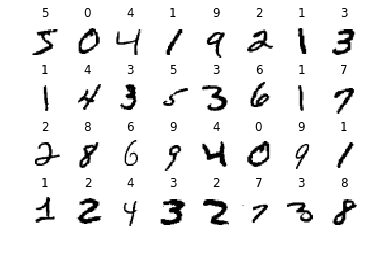

In [13]:
images_and_labels = list(zip(x_train, y_train))
for index, (image, label) in enumerate(images_and_labels[:32]):
    plt.subplot(4, 8, index + 1)
    # 不显示坐标轴
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)

将每一幅图像都转换为一个长向量，大小为28*28=784

In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_train = x_train.astype('float32')
print(x_train.shape) 

(60000, 784)


归一化，将图像的像素归到0~1

In [12]:
x_train = x_train / 255
x_test = x_test / 255

将label也转换成One-hot标签，这里直接用keras的预置的一个函数 keras.utils.to_categorical

In [15]:
print(y_train[0: 10])# 查看原始标签 0~9

[5 0 4 1 9 2 1 3 1 4]


In [16]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print(y_train[0:10])#查看转换完毕的标签

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


开始构建模型，模型分包含两个隐层和一个输出层,都是全连接层，使用Sequential构建

其中隐层输出采用ReLU激活函数，Sequential的第一层要指定input_shape，要注意，这里的input_shape 是不包含batch大小的，就只是后面几维

In [19]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784, )))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()#这一句用来输出网络结构

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


配置模型，主要包括 
loss：loss计算方法（损失函数）

optimizer：优化函数

metrics：指定哪些量需要在训练及测试中关注，一般都会写accuracy

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

开始训练。这里使用的是model对象的fit方法。前两个参数分别是完整的训练数据和训练标签

batch_size 表示每一次塞入多少张图片

epochs 表示训练几轮

verbose 表示用何种方式显示输出信息，0表示不输出，1表示在一直输出更新，2表示每一个epoch才输出一次。

validation_data 表示验证集，格式和训练集一样，如果此参数不为空的话，每一个epoch过后就会输出验证集的loss和accuracy


In [22]:
# verbose=1 按照进度条输出log，=0是标准的log输出
model.fit(x_train,y_train,
          batch_size=64,
          epochs=2,
          verbose=1,
          validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 101us/step - loss: 0.3886 - acc: 0.8878 - val_loss: 0.2633 - val_acc: 0.9210
Epoch 2/2
60000/60000 [==============================] - 5s 85us/step - loss: 0.2575 - acc: 0.9237 - val_loss: 0.2408 - val_acc: 0.9310


In [23]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',score[0])
print('Test accuracy',score[1])

10000/10000 [==============================] - 0s 39us/step
Test loss: 0.24077000817656516
Test accuracy 0.931
